In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from time import time
import timeit

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, classification_report
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('../RiverRoad_Quan_RF.csv')
X = df.drop(['GRID_ID', 'wetland_type', 'wetland', 'FID_RiverRd_AOI'], axis=1)
y = df.FID_RiverRd_AOI

In [4]:
kf = KFold(n_splits=5, random_state=2, shuffle=True)

In [66]:
#start_time = timeit.default_timer()

p_acc_score = {0: 0}
p_acc_score_std = {0:0}

for p in range(10, 61, 10):
    for train_index , test_index in kf.split(df):
        acc_score = [];
        Truth = [];
        Output = [];
        
        X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index], y.iloc[test_index]

        pca = PCA(n_components=p)
        New_X_train = pca.fit_transform(X_train)
        New_X_test = pca.transform(X_test)

        model = RandomForestClassifier(max_features = p, random_state = 2)
        model.fit(New_X_train,y_train)
        pred_values = model.predict(New_X_test)

        acc = accuracy_score(y_test, pred_values)
        acc_score.append(acc)

        Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
        Output.extend(pred_values);
        
    p_acc_score[p] = np.mean(acc_score)

del p_acc_score[0]
# elapsed = timeit.default_timer() - start_time #gives total computation time
# print("---Run time is %s seconds ---" % elapsed) #prints computation time
# print()

(0.8, 0.9)

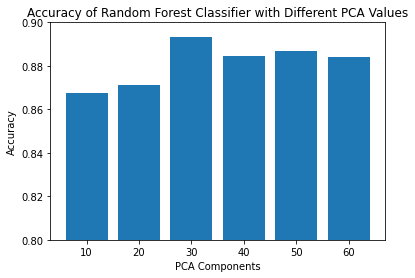

In [74]:
scores = p_acc_score
plt.bar(range(len(p_acc_score)), list(p_acc_score.values()), tick_label=list(p_acc_score.keys()))
plt.title("Accuracy of Random Forest Classifier with Different PCA Values")
plt.ylabel("Accuracy")
plt.xlabel("PCA Components")
plt.ylim([.8, .9])

In [75]:
p_acc_score = {0: 0}
p_acc_score_std = {0:0}

for p in range(25, 35, 2):
    for train_index , test_index in kf.split(df):
        acc_score = [];
        Truth = [];
        Output = [];
        
        X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index], y.iloc[test_index]

        pca = PCA(n_components=p)
        New_X_train = pca.fit_transform(X_train)
        New_X_test = pca.transform(X_test)

        model = RandomForestClassifier(max_features = p, random_state = 2)
        model.fit(New_X_train,y_train)
        pred_values = model.predict(New_X_test)

        acc = accuracy_score(y_test, pred_values)
        acc_score.append(acc)

        Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
        Output.extend(pred_values);
        
    p_acc_score[p] = np.mean(acc_score)

del p_acc_score[0]

(0.8, 0.9)

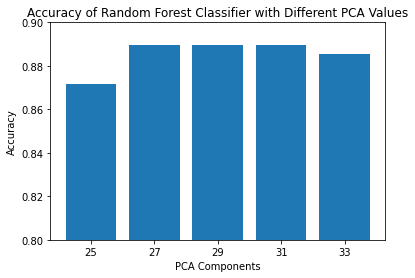

In [76]:
scores_30s = p_acc_score
plt.bar(range(len(p_acc_score)), list(p_acc_score.values()), tick_label=list(p_acc_score.keys()))
plt.title("Accuracy of Random Forest Classifier with Different PCA Values")
plt.ylabel("Accuracy")
plt.xlabel("PCA Components")
plt.ylim([.8, .9])

In [5]:
start_time = timeit.default_timer()
acc_score = [];
Truth = [];
Output = [];
for train_index , test_index in kf.split(df):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]

    pca = PCA(n_components=29)
    New_X_train = pca.fit_transform(X_train)
    New_X_test = pca.transform(X_test)

    model = RandomForestClassifier(max_features = 29, random_state = 2)
    model.fit(New_X_train,y_train)
    pred_values = model.predict(New_X_test)

    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values);
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

---Run time is 157.53795209999998 seconds ---



In [6]:
np.mean(acc_score)

0.883985202591434

In [7]:
Truth = np.asarray(Truth)  ## or np.array(Truth)
Output = np.asarray(Output)

In [8]:
np.column_stack((Truth, Output))

array([[0, 1],
       [0, 1],
       [1, 1],
       ...,
       [0, 0],
       [0, 0],
       [1, 1]], dtype=int64)

In [9]:
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output, digits=4))

[[2429  715]
 [ 284 5183]]
              precision    recall  f1-score   support

           0     0.8953    0.7726    0.8294      3144
           1     0.8788    0.9481    0.9121      5467

    accuracy                         0.8840      8611
   macro avg     0.8870    0.8603    0.8708      8611
weighted avg     0.8848    0.8840    0.8819      8611

